## kaggle : IEEE_FraudDetection(EDA)
### link : https://www.kaggle.com/competitions/ieee-fraud-detection/overview

In [3]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings(action='ignore')


## 데이터 불러오기
### train데이터는 train_transaction과 train_identity를 merge한(on left) CSV파일
### test데이터는 test_transaction과 test_identity를 merge한(on left) CSV파일 

In [4]:
base_path = './data/extracted/'
train = pd.read_csv(base_path + 'train.csv')
test = pd.read_csv(base_path + 'test.csv')
# sample_sub = pd.read_csv(base_path + 'sample_submission.csv')


### Head값으로 파일 확인

In [5]:
print(train.head(2))
# print(test.head(2))

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   

   card2  card3       card4  card5  ... id_31  id_32  id_33  id_34  id_35  \
0    NaN  150.0    discover  142.0  ...   NaN    NaN    NaN    NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...   NaN    NaN    NaN    NaN    NaN   

  id_36 id_37  id_38  DeviceType  DeviceInfo  
0   NaN   NaN    NaN         NaN         NaN  
1   NaN   NaN    NaN         NaN         NaN  

[2 rows x 434 columns]


### 전체 컬럼 값 확인

In [6]:
# pd.set_option('display.max_columns', None)  #중간에 ... 없이 파일 보기
# pd.set_option('display.max_seq_items', 10000) #중간에 ... 없이 파일 보기
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object', length=434)

### merge 축인 TransactionID 값을 index로 지정

In [7]:
train = train.set_index('TransactionID')
train.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


### 결측치 확인

In [8]:
# print(train2.info(), train2.isna().sum())

### 불필요한 컬럼 제거 후, 전체 체크 
### C1~V339 컬럼 제거 

In [9]:
# train2.columns[train2.columns.str.contains('V')]

In [10]:
# train[train.columns.drop(list(train.filter(regex='C')))]
# train.filter(regex='C')

pd.set_option('display.max_columns', None)
# pd.set_option('display.max_seq_items', 10000)
train1 = train.drop((train.loc[:,'C1':'V339']), axis=1)
train1.head(2)

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### EDA파트인 id값만 분리하여 결측치 및 관계 파악
### kaggle내 id_table 컬럼에 대한 정보

Identity Table *
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)
이 테이블의 변수는 네트워크 연결 정보(IP, ISP, Proxy 등)와 트랜잭션과 관련된 디지털 서명(UA/browser/os/version 등)-아이덴티티 정보입니다.
Vesta의 사기 방지 시스템과 디지털 보안 파트너가 수집합니다.
(필드명은 마스킹 처리되며 개인정보 보호 및 계약 동의를 위해 pairwise 사전은 제공하지 않습니다)

“id01 to id11 are numerical features for identity, which is collected by Vesta and security partners such as device rating, ip_domain rating, proxy rating, etc. Also it recorded behavioral fingerprint like account login times/failed to login times, how long an account stayed on the page, etc. All of these are not able to elaborate due to security partner T&C. I hope you could get basic meaning of these features, and by mentioning them as numerical/categorical, you won't deal with them inappropriately.”

“id01 ~ id11은 기기 등급, ip_domain 등급, 프록시 등급 등 Vesta와 보안 파트너가 수집하는 신원에 대한 숫자 기능입니다. 또한 계정 로그인 횟수/로그인 실패 횟수, 계정 기간과 같은 행동 지문을 기록했습니다. 페이지에 머물렀다 등. 이들은 모두 보안 파트너 T&C로 인해 자세히 설명할 수 없습니다. 이러한 기능의 기본적인 의미를 파악하고 수치/범주로 언급하여 부적절하게 다루지 않기를 바랍니다.”

Categorical Features:
-DeviceType
-DeviceInfo
-id_12 ~ id_38

In [11]:
# 샘플 파일의 'id_'가 포함된 열을 기준으로 id_sample 
# sample.isna().sum()
id_list = train1.filter(regex='id_')
id_sample = pd.concat([id_list, train1[['isFraud','DeviceType','DeviceInfo']]], axis=1)
id_sample


,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,isFraud,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2987001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2987002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2987003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,0,mobile,SAMSUNG SM-G892A Build/NRD90M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3577536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
3577537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


In [12]:
id_sample.isnull().sum().head()

id_01    446307
id_02    449668
id_03    524216
id_04    524216
id_05    453675
dtype: int64

In [13]:
print(id_sample.columns.unique())
print(id_sample.columns.nunique())


Index(['id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08',
       'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16',
       'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24',
       'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32',
       'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'isFraud',
       'DeviceType', 'DeviceInfo'],
      dtype='object')
41


In [14]:
#결측치 시각화 라이브러리 
import missingno as msno

<Figure size 720x432 with 0 Axes>

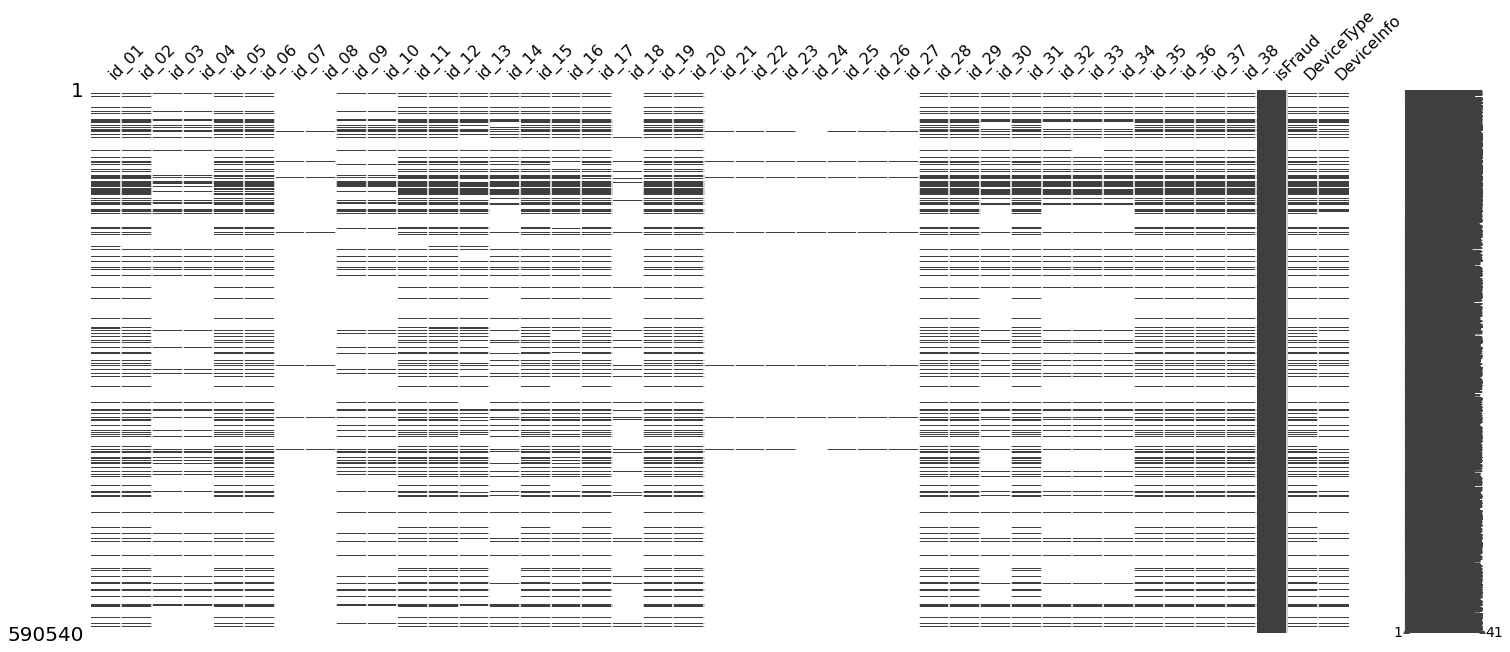

In [15]:
#id_컬럼의 결측치 시각화
plt.figure(figsize=(10,6))
msno.matrix(id_sample)
plt.show()

In [16]:
# df1 = id_sample[id_sample.isFraud == 0]
# df2 = id_sample[id_sample.isFraud == 1]

# plt.subplot(1,2,1)
# msno.matrix(df1)

# plt.subplot(1,2,2)
# msno.matrix(df2)


<AxesSubplot:>

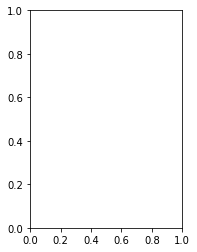

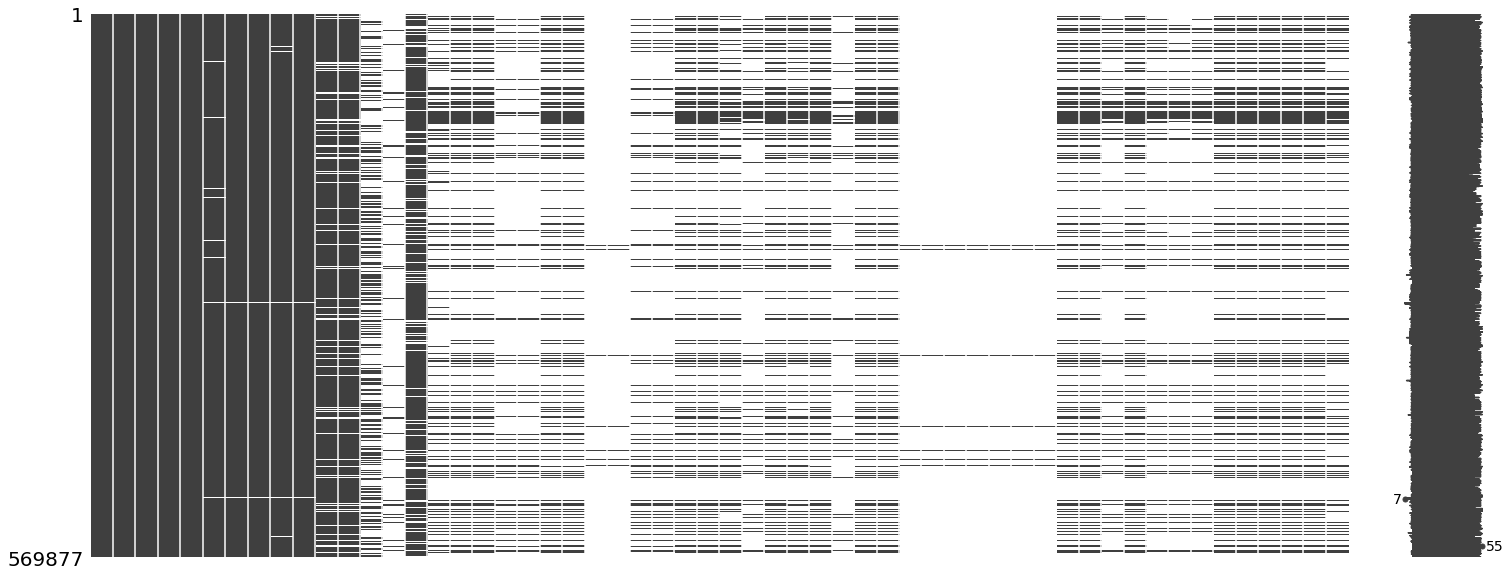

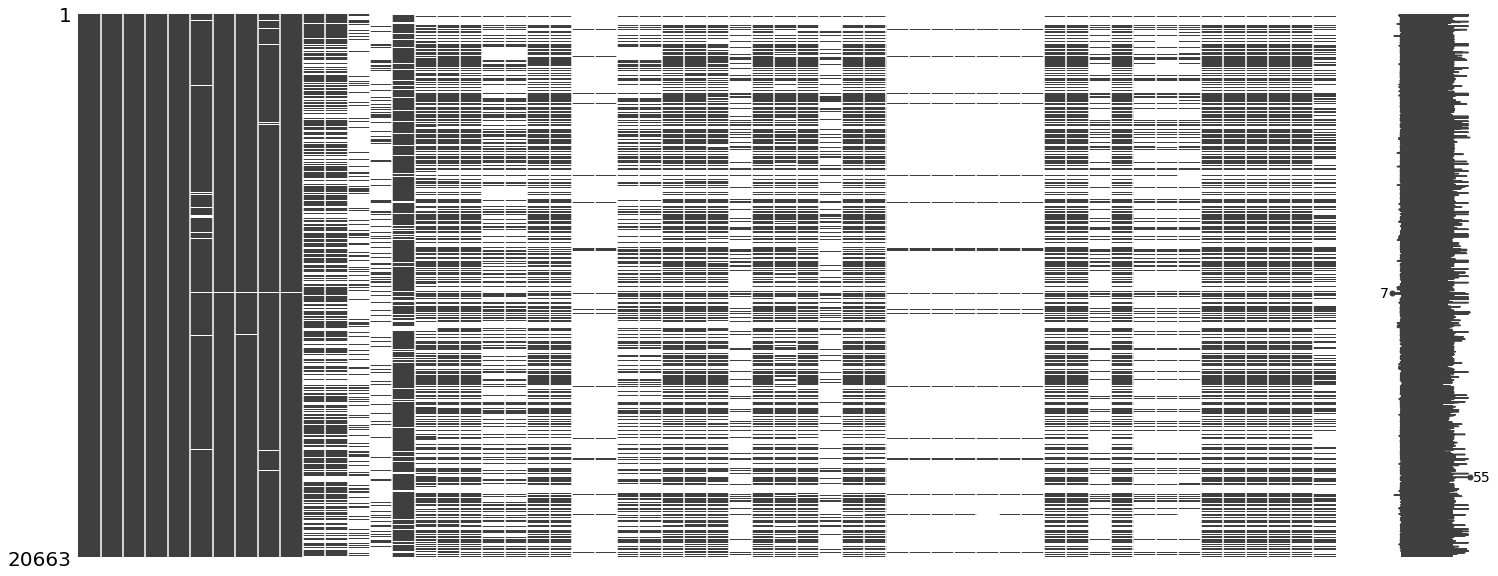

In [17]:
df3 = train1[train1.isFraud == 0]
df4 = train1[train1.isFraud == 1]

plt.subplot(1,2,1)
msno.matrix(df3)

plt.subplot(1,2,2)
msno.matrix(df4)


In [18]:
#id컬럼별 결측치 비율 파악
# (id_sample.isnull().sum()/len(id_sample)).round(2)
null_rate = pd.DataFrame((train1.isnull().sum()/len(train1)*100).sort_values(ascending=False))
null_rate.columns = ['null_ratio']
null_rate.null_ratio.unique()

array([99.19615945, 99.13096488, 99.12707014, 99.12639279, 99.12571545,
       99.12469943, 93.62837403, 92.3607207 , 88.76892336, 87.58949436,
       87.31229045, 86.86541132, 86.86185525, 86.82477055, 86.44562604,
       79.90551021, 78.4400718 , 78.09801199, 76.82375453, 76.75161716,
       76.41802418, 76.408372  , 76.39973583, 76.24513157, 76.15572188,
       76.14522302, 76.12727334, 76.12608799, 75.57608291, 59.65235208,
       15.99485217, 11.12642666,  1.51268331,  0.72120432,  0.26704372,
        0.2660277 ,  0.26501168,  0.        ])

In [19]:
print(train1.columns[(train1.isnull().sum()/len(train1)*100) > 50])
print(train1.columns[(train1.isnull().sum()/len(train1)*100) > 50].nunique())

Index(['dist1', 'dist2', 'R_emaildomain', 'id_01', 'id_02', 'id_03', 'id_04',
       'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20',
       'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28',
       'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36',
       'id_37', 'id_38', 'DeviceType', 'DeviceInfo'],
      dtype='object')
43


In [20]:
train1.drop(['dist2','id_03','id_04','id_07', 'id_08', 'id_14', 'id_18', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25','id_26', 'id_27', 'id_30', 'id_32', 'id_33', 'id_34'], axis=1, inplace=True)
train1.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,outlook.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,gmail.com,NaN,0.0,70787.0,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,New,NotFound,166.0,542.0,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [21]:
sampling = train1.sample(frac=0.01, random_state=48, replace=False)
sampling

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3535548,0,14490524,226.00,W,11546,170.0,150.0,mastercard,102.0,credit,204.0,87.0,NaN,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3168136,0,3981459,83.50,W,16560,476.0,150.0,visa,166.0,debit,181.0,87.0,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419026,0,10929894,92.00,W,10856,268.0,150.0,visa,166.0,debit,226.0,87.0,5.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3066609,0,1720970,250.00,R,10616,583.0,150.0,visa,226.0,credit,220.0,87.0,NaN,outlook.com,outlook.com,-5.0,172882.0,0.0,0.0,0.0,0.0,100.0,Found,49.0,Found,Found,166.0,341.0,394.0,Found,Found,chrome 63.0 for android,T,F,T,F,mobile,SM-G955U Build/NRD90M
3292101,0,7579087,82.95,W,14079,360.0,150.0,mastercard,126.0,debit,204.0,87.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157344,0,3684724,1104.00,W,15241,310.0,150.0,mastercard,224.0,debit,330.0,87.0,13.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3231655,0,5806669,35.95,W,1577,302.0,150.0,visa,226.0,debit,512.0,87.0,70.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3157848,0,3694089,57.95,W,2303,197.0,150.0,visa,226.0,debit,325.0,87.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
#mlxtend라이브러리를 이용하여 연관 규칙 분석 수행
# !pip install mlxtend

In [23]:
sampling.corr()


,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_13,id_17,id_19,id_20
isFraud,1.000000,0.005428,0.024329,-0.024848,0.013598,0.145057,-0.040466,0.010139,0.020979,0.040853,-0.077382,0.100462,0.052116,-0.052971,0.042904,-0.002338,0.032576,-0.065400,0.130125,-0.041062,0.019731
TransactionDT,0.005428,1.000000,-0.002090,-0.000969,-0.032437,-0.005141,-0.031326,0.004379,0.021353,-0.083673,-0.054358,0.161600,-0.037171,-0.041637,-0.012730,0.066410,0.009816,0.069001,0.195636,-0.016821,0.059118
TransactionAmt,0.024329,-0.002090,1.000000,-0.019153,0.021320,-0.117726,0.021326,-0.011791,0.025569,0.062639,0.057109,-0.000109,0.084607,-0.007810,0.051089,-0.010274,-0.030780,0.032203,-0.356797,0.073290,-0.133397
card1,-0.024848,-0.000969,-0.019153,1.000000,0.007704,-0.018438,-0.092639,0.033794,0.011339,0.020642,0.004918,-0.015709,-0.007842,0.018102,-0.010814,0.062042,0.000883,0.018005,-0.038961,0.044663,0.028084
card2,0.013598,-0.032437,0.021320,0.007704,1.000000,0.013000,0.020334,0.006678,-0.000819,0.021942,0.037447,-0.013716,-0.011736,0.013285,0.027284,-0.014176,0.000292,0.012853,-0.038410,0.014756,-0.031745
card3,0.145057,-0.005141,-0.117726,-0.018438,0.013000,1.000000,-0.156386,-0.020534,-0.360851,-0.085764,-0.126416,0.302314,-0.163024,-0.066227,-0.046904,0.036213,0.062783,-0.013518,0.731175,-0.174462,0.243338
card5,-0.040466,-0.031326,0.021326,-0.092639,0.020334,-0.156386,1.000000,0.027230,0.000541,-0.011489,0.018588,-0.091522,0.068073,-0.017477,0.041760,-0.027161,-0.038919,0.037510,-0.208341,0.021785,-0.155302
addr1,0.010139,0.004379,-0.011791,0.033794,0.006678,-0.020534,0.027230,1.000000,0.003319,-0.017010,0.056633,-0.025223,-0.004115,0.028196,0.031133,0.086957,-0.064269,-0.023055,-0.062087,-0.003163,-0.182780
addr2,0.020979,0.021353,0.025569,0.011339,-0.000819,-0.360851,0.000541,0.003319,1.000000,NaN,0.032129,-0.022002,0.048575,0.023485,-0.013452,0.017910,0.041154,0.093782,-0.257488,-0.027333,0.012908
dist1,0.040853,-0.083673,0.062639,0.020642,0.021942,-0.085764,-0.011489,-0.017010,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# isFraud : id_1,2,9,17,19,20 
# TransDT : card2, card5, dis1, id_1, 2, 6, 10, 17
# TransAmt : dis1, id_1, 5, 9, 17, 20
# 주요 id 피쳐 : 'id_1','id_2','id_5','id_6','id_9','id_10','id_17','id_19','id_20'

In [25]:
# import matplotlib.pyplot as plt
# import matplotlib.colors as mcl
# from matplotlib.colors import LinearSegmentedColormap
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

In [26]:
# records = []
# for i in range(len(sampling)):
#     records.append([str(sampling.values[i,j]) for j in range(len(sampling.columns)) if not pd.isna(sampling.values[i,j])])

In [27]:
# te = TransactionEncoder()
# te_ary = te.fit(records).transform(records, sparse=True)
# te_df = pd.DataFrame.sparse.from_spmatrix(te_ary, columns=te.columns_)

In [28]:
# #실패 ValueError: negative dimensions are not allowed ValueError: 음수 측정기준은 허용되지 않습니다.(음수값 때문에 측정불가)
# frequent_itemset = apriori(te_df, min_support=0.005, max_len=10, use_colnames=True, verbose=1)
# frequent_itemset['length'] = frequent_itemset['itemsets'].map(lambda x: len(x))
# frequent_itemset.sort_values('support',ascending=False,inplace=True)


In [29]:
# 범주형 엔코더 다운로드
# !pip install category_encoders
## 전체 feature engineering 진행(방향 선행)

In [30]:
from category_encoders import BinaryEncoder
# import category_encoders as ce  
from sklearn.preprocessing import LabelEncoder

# object = sampling[['isFraud','ProductCD','card4','card6','P_emaildomain','R_emaildomain','id_12','id_15','id_16','id_28','id_29','id_31','id_35','id_36','id_37','id_38','DeviceType','DeviceInfo']]

y = sampling.isFraud
X = pd.DataFrame(sampling, columns=['ProductCD','card4','card6','P_emaildomain'])

enc = BinaryEncoder().fit(X, y)
bin_object = enc.transform(X)


In [31]:
bin_object


,ProductCD_0,ProductCD_1,ProductCD_2,card4_0,card4_1,card4_2,card6_0,card6_1,P_emaildomain_0,P_emaildomain_1,P_emaildomain_2,P_emaildomain_3,P_emaildomain_4,P_emaildomain_5
TransactionID,,,,,,,,,,,,,,
3535548,0,0,1,0,0,1,0,1,0,0,0,0,0,1
3168136,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3419026,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3066609,0,1,0,0,1,0,0,1,0,0,0,0,1,1
3292101,0,0,1,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157344,0,0,1,0,0,1,1,0,0,0,0,0,1,0
3231655,0,0,1,0,1,0,1,0,0,0,0,0,1,0
3157848,0,0,1,0,1,0,1,0,0,0,0,1,0,0


In [32]:
sampling.head()

,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,P_emaildomain,R_emaildomain,id_01,id_02,id_05,id_06,id_09,id_10,id_11,id_12,id_13,id_15,id_16,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3535548,0,14490524,226.00,W,11546,170.0,150.0,mastercard,102.0,credit,204.0,87.0,NaN,yahoo.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3168136,0,3981459,83.50,W,16560,476.0,150.0,visa,166.0,debit,181.0,87.0,NaN,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3419026,0,10929894,92.00,W,10856,268.0,150.0,visa,166.0,debit,226.0,87.0,5.0,gmail.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3066609,0,1720970,250.00,R,10616,583.0,150.0,visa,226.0,credit,220.0,87.0,NaN,outlook.com,outlook.com,-5.0,172882.0,0.0,0.0,0.0,0.0,100.0,Found,49.0,Found,Found,166.0,341.0,394.0,Found,Found,chrome 63.0 for android,T,F,T,F,mobile,SM-G955U Build/NRD90M
3292101,0,7579087,82.95,W,14079,360.0,150.0,mastercard,126.0,debit,204.0,87.0,158.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
final = pd.concat([train[['isFraud','TransactionDT','TransactionAmt','dist1','id_01','id_02','id_05','id_06','id_09','id_10','id_17','id_19','id_20']], bin_object], axis=1)
final.head()


,isFraud,TransactionDT,TransactionAmt,dist1,id_01,id_02,id_05,id_06,id_09,id_10,id_17,id_19,id_20,ProductCD_0,ProductCD_1,ProductCD_2,card4_0,card4_1,card4_2,card6_0,card6_1,P_emaildomain_0,P_emaildomain_1,P_emaildomain_2,P_emaildomain_3,P_emaildomain_4,P_emaildomain_5
TransactionID,,,,,,,,,,,,,,,,,,,,,,,,,,,
2987000,0,86400,68.5,19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987001,0,86401,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987002,0,86469,59.0,287.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987003,0,86499,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2987004,0,86506,50.0,NaN,0.0,70787.0,NaN,NaN,NaN,NaN,166.0,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# %pip install pycaret
# %pip install lightGBM

In [40]:
# from pycaret.classification import *
# from pycaret.regression import *
# from pycaret.clustering import *
# from pycaret.anomaly import *
# from pycaret.nlp import *
# from pycaret.arules import *



In [45]:
from pycaret.classification import *
clf = setup(data=train, target='isFraud', train_size=0.8)

RuntimeError: This version of PyCaret requires scikit-learn==0.23.2, got 1.1.1. Support for newer scikit-learn versions will be added in a future release.